In [53]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

db_filename = 'dinofunworld.db'
conn = sqlite3.connect(db_filename)
c = conn.cursor()

In [58]:
# Create a distance matrix suitable for use in hierarchical clustering of the checkin sequences of the 5 specified visitors.

c.execute("SELECT visitorID, sequence FROM sequences WHERE visitorID IN (165316, 1835254, 296394, 404385, 448990)")

seqFrame = pd.DataFrame.from_records(c.fetchall(), columns=['visitorID','sequence'])

seqFrame['sequence']=seqFrame['sequence'].apply(lambda y: [i for i in y.split("-")])

#there is 5 visitorID data
outer={}
for i in range(0,5):
    inner={}
    for j in  range(0,5):
        if i != j:
            distance= sum(1 for x, y in zip(seqFrame['sequence'][i], seqFrame['sequence'][j]) if x != y)
            inner[seqFrame['visitorID'][j]]=distance
    outer[seqFrame['visitorID'][i]]=inner

print(outer)


{165316: {296394: 318, 404385: 329, 448990: 318, 1835254: 336}, 296394: {165316: 318, 404385: 303, 448990: 0, 1835254: 282}, 404385: {165316: 329, 296394: 303, 448990: 303, 1835254: 298}, 448990: {165316: 318, 296394: 0, 404385: 303, 1835254: 282}, 1835254: {165316: 336, 296394: 282, 404385: 298, 448990: 282}}


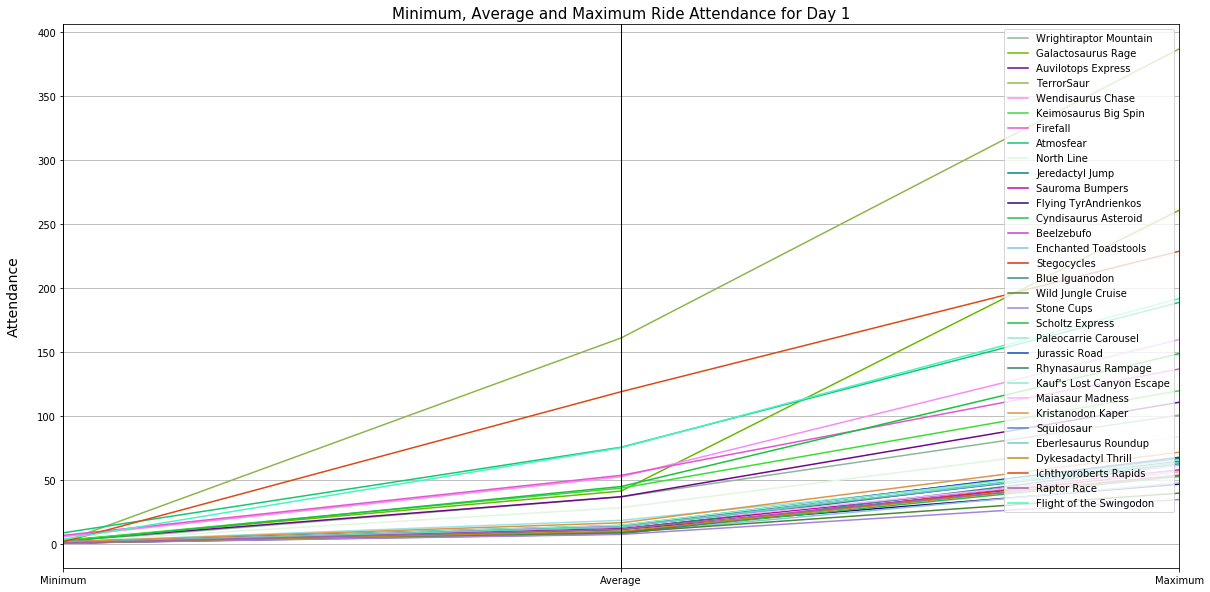

                         Name  Minimum     Average  Maximum
0      Wrightiraptor Mountain        2   37.093750      101
1          Galactosaurus Rage        3   41.630208      261
2          Auvilotops Express        3   37.218750      111
3                  TerrorSaur        2  161.255208      387
4           Wendisaurus Chase        6   52.817708      160
5        Keimosaurus Big Spin        3   43.916667      120
6                    Firefall        7   53.947917      137
7                   Atmosfear        9   75.890625      189
8                  North Line        2   28.651042       84
9             Jeredactyl Jump        2   14.708333       67
10            Sauroma Bumpers        1   12.281250       58
11       Flying TyrAndrienkos        1   11.781250       47
12       Cyndisaurus Asteroid        1    9.031250       53
13                 Beelzebufo        2    9.036458       58
14       Enchanted Toadstools        1    8.812500       48
15                Stegocycles        1  

In [57]:
# Create and display a Parallel Coordinate Plot displaying the minimum, average, and maximum attendance for each ride in the park
        #1.先选出符合要求的sequence和ID数据
        #2.如第一题，对seq进行分割，并留下第一天的数据；
        #3.将seq里的ID和RideID进行对比，如果符合则置1，否则置0
        #4.累加所有的ID积累attendance，用np的内置函数计算min maximum，average
        #5.把ride名称和min，max,ave append到result列表里
        #6.输出图像

c.execute("SELECT attractionID, name FROM attraction WHERE category LIKE '%Rides%' ORDER BY attractionID ")
Rides = c.fetchall()

c.execute("SELECT visitorID, sequence FROM sequences;")

seqFrame = pd.DataFrame.from_records(c.fetchall(), columns=['visitorID', 'sequence'])

seqFrame['sequence'] = seqFrame['sequence'].apply(lambda y: [i for i in y.split("-")])

#sequence data for day1
seqFrame['sequence']=seqFrame['sequence'].str[:192]

result=[]
for i in range(len(Rides)):
    seqFrame['sequence_i'] = seqFrame['sequence'].apply(lambda y: [1 if j==str(Rides[i][0]) else 0 for j in y])
    visitorCount = np.sum(seqFrame['sequence_i'].values.tolist(), axis=0)
    avg = np.mean(visitorCount)
    visitorCount = visitorCount[np.nonzero(visitorCount)]
    min = np.min(visitorCount)
    max = np.max(visitorCount)
    
    result.append([Rides[i][1], min, avg, max])

df = pd.DataFrame(result, columns = ['Name', 'Minimum', 'Average', 'Maximum'])
print(df)


pd.plotting.parallel_coordinates(df, 'Name')
plt.ylabel('Attendance', fontsize=14, labelpad=16)    
    
plt.title('Minimum, Average and Maximum Ride Attendance for Day 1', fontsize=15)
plt.figure(figsize=(20,10))

plt.show()

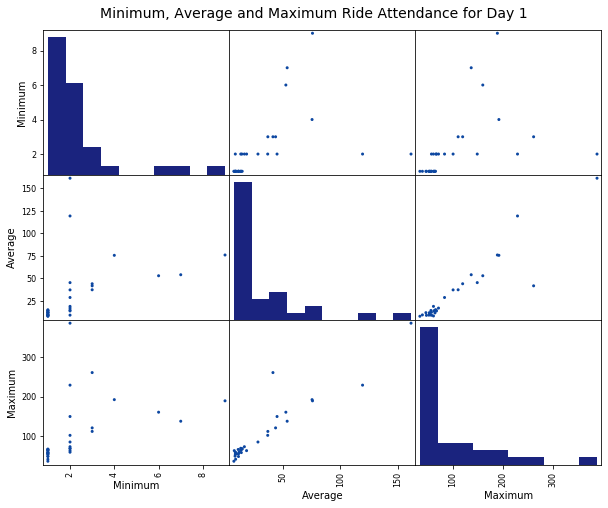

                         Name  Minimum     Average  Maximum
0      Wrightiraptor Mountain        2   37.093750      101
1          Galactosaurus Rage        3   41.630208      261
2          Auvilotops Express        3   37.218750      111
3                  TerrorSaur        2  161.255208      387
4           Wendisaurus Chase        6   52.817708      160
5        Keimosaurus Big Spin        3   43.916667      120
6                    Firefall        7   53.947917      137
7                   Atmosfear        9   75.890625      189
8                  North Line        2   28.651042       84
9             Jeredactyl Jump        2   14.708333       67
10            Sauroma Bumpers        1   12.281250       58
11       Flying TyrAndrienkos        1   11.781250       47
12       Cyndisaurus Asteroid        1    9.031250       53
13                 Beelzebufo        2    9.036458       58
14       Enchanted Toadstools        1    8.812500       48
15                Stegocycles        1  

In [54]:
# Create and display a Scatterplot Matrix displaying the minimum, average, and maximum attendance for each ride in the park.

c.execute("SELECT attractionID, name FROM attraction WHERE category LIKE '%ides%' ORDER BY attractionID ")
Rides = c.fetchall()

c.execute("SELECT visitorID, sequence FROM sequences;")

seqFrame = pd.DataFrame.from_records(c.fetchall(), columns=['visitorID', 'sequence'])

seqFrame['sequence'] = seqFrame['sequence'].apply(lambda y: [i for i in y.split("-")])

#sequence data for one day (first day)
seqFrame['sequence']=seqFrame['sequence'].str[:192]

result=[]
for i in range(len(Rides)):
    seqFrame['sequence_i'] = seqFrame['sequence'].apply(lambda y: [1 if j==str(Rides[i][0]) else 0 for j in y])
    visitorCount = np.sum(seqFrame['sequence_i'].values.tolist(), axis=0)
    avg = np.mean(visitorCount)
    visitorCount = visitorCount[np.nonzero(visitorCount)]
    min = np.min(visitorCount)
    max = np.max(visitorCount)
    
    result.append([Rides[i][1], min, avg, max])

df = pd.DataFrame(result, columns = ['Name', 'Minimum', 'Average', 'Maximum'])
pd.plotting.scatter_matrix(df, diagonal='hist', figsize=(15,9), alpha=1, c='#0D47A1', hist_kwds={'color':['#1A237E']})
plt.suptitle('Min, Ave and Max Ride Attendance for Day 1', y=0.96, fontsize=18)

plt.show()

print(df)